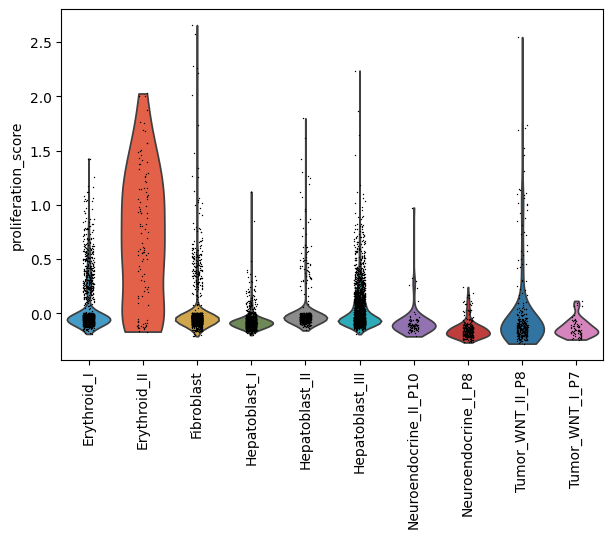

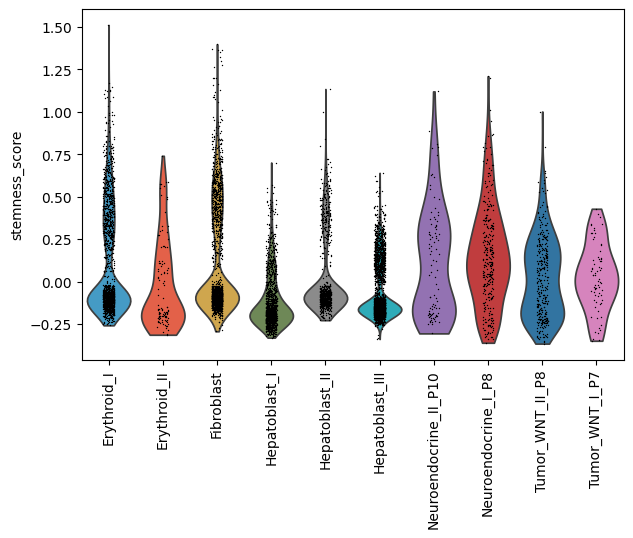

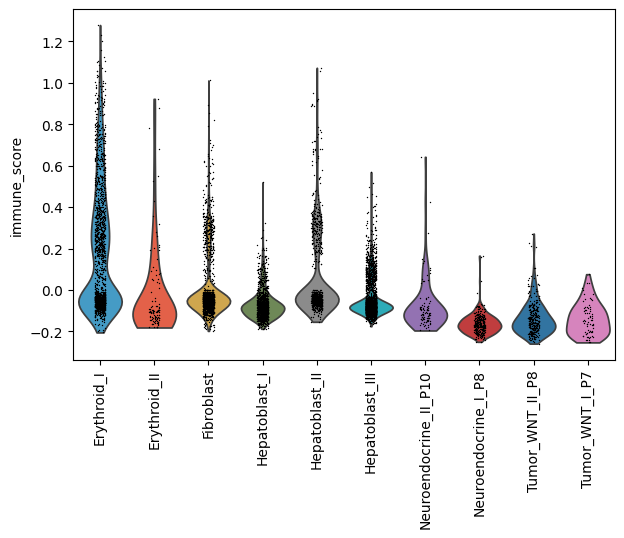

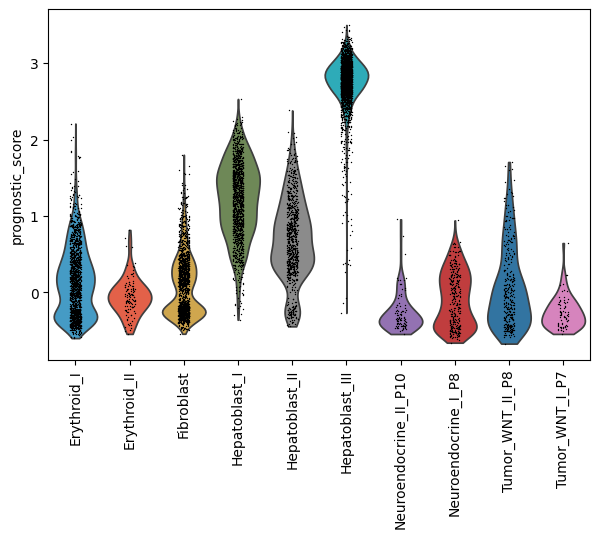

Cluster risk scores saved to outputs/cluster_risk_scores.csv


/var/folders/mh/scns_xl50h53fkt0htmxk2cc0000gn/T/ipykernel_27850/521781673.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_scores = adata.obs.groupby('Tumor_Type')[['proliferation_score', 'stemness_score', 'immune_score', 'prognostic_score']].mean()


In [3]:
# Import libraries
import scanpy as sc
import pandas as pd

# Load your data
adata = sc.read_h5ad('/Users/amurti/Desktop/UCSF_Projects/Hepatoblastoma_manuscript/sc_scratch_analysis/hb_tumor.h5ad')

# ---------------------------
# 1. Proliferation Score
# ---------------------------
proliferation_genes = ['MKI67', 'PCNA', 'TOP2A', 'BIRC5', 'UBE2C']
sc.tl.score_genes(adata, gene_list=proliferation_genes, score_name='proliferation_score')
# Visualize
sc.pl.violin(adata, keys='proliferation_score', groupby='Tumor_Type', rotation=90)

# ---------------------------
# 2. Stemness/Differentiation Score
# ---------------------------
stemness_genes = ['SOX2', 'NANOG', 'POU5F1', 'KLF4', 'MYC']
sc.tl.score_genes(adata, gene_list=stemness_genes, score_name='stemness_score')
sc.pl.violin(adata, keys='stemness_score', groupby='Tumor_Type', rotation=90)

# ---------------------------
# 3. Immune Infiltration Score
# ---------------------------
immune_genes = ['CD3D', 'CD3E', 'CD4', 'CD8A', 'FOXP3', 'CD68', 'CD163']
sc.tl.score_genes(adata, gene_list=immune_genes, score_name='immune_score')
sc.pl.violin(adata, keys='immune_score', groupby='Tumor_Type', rotation=90)

# ---------------------------
# 4. Published Prognostic Signature Score
# ---------------------------
# Example signature - customize with literature-based markers
prognostic_genes = ['AFP', 'GPC3', 'IGF2', 'DLK1', 'DLK2']
sc.tl.score_genes(adata, gene_list=prognostic_genes, score_name='prognostic_score')
sc.pl.violin(adata, keys='prognostic_score', groupby='Tumor_Type', rotation=90)

# ---------------------------
# Export cluster mean scores for integration
# ---------------------------
cluster_scores = adata.obs.groupby('Tumor_Type')[['proliferation_score', 'stemness_score', 'immune_score', 'prognostic_score']].mean()
cluster_scores.to_csv('../outputs/cluster_risk_scores.csv')

print("Cluster risk scores saved to outputs/cluster_risk_scores.csv")

In [5]:
import pandas as pd

risk_scores_df = pd.read_csv('../outputs/cluster_risk_scores.csv', index_col=0)

# Min-max scale each score column
for col in ['proliferation_score', 'stemness_score', 'immune_score', 'prognostic_score']:
    min_val = risk_scores_df[col].min()
    max_val = risk_scores_df[col].max()
    risk_scores_df[col + '_scaled'] = (risk_scores_df[col] - min_val) / (max_val - min_val)

# Save the scaled scores
risk_scores_df.to_csv('../outputs/cluster_risk_scores_scaled.csv')